<h1>1. Apa itu Covariance dan cara menghitungnya</h1>

<p>Covariance bisa dibilang ukuran dari seberapa banyak dua buah variabel acak berubah bersama. Dengan kata lain covariance merupakan ukuran kekuatan korelasi dua buah variabel acak.</p>

<p>Cara menghitungnya : </p>
<p>E (Xi - mean X) (Yi - mean Y) / n-1</p>

<h1>2. Buat tabel perbedaan covariance dan correlation<h1>

<table style="width:100%">
    <tr>
        <th style="text-align:center;color:blue">Covariance</th>
        <th style="text-align:center;color:blue">Correlation</th>
    </tr>
    <tr>
        <td style="text-align:left">Ada 3 jenis : 
            <ul>Covariance positif : p > 0 </ul>
            <ul>Covariance negatif : p < 0 </ul>
            <ul>Zero Covariance : p = 0 </ul>
        </td>
        <td style="text-align:left">Nilainya ada diantara : -1 <= p <= 1</td>
    </tr>
    <tr>
        <td style="text-align:left">Ukuran kekuatan korelasi</td>
        <td style="text-align:left">Ukuran kekuatan linearitas</td>
    </tr>
</table>

<h1>3. Scatterplot and Correlation Mileage vs Price</h1>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
dataset_mobil = pd.read_csv("Dataset Penjualan Mobil.csv")
dataset_mobil

,Brand,Body,Mileage,EngineVolume,Engine Type,Registration,Year,Model,Price
0,BMW,sedan,277,2.0,Petrol,yes,1991,320,4200.0
1,Mercedes-Benz,van,427,2.9,Diesel,yes,1999,Sprinter 212,7900.0
2,Mercedes-Benz,sedan,358,5.0,Gas,yes,2003,S 500,13300.0
3,Audi,crossover,240,4.2,Petrol,yes,2007,Q7,23000.0
4,Toyota,crossover,120,2.0,Petrol,yes,2011,Rav 4,18300.0
...,...,...,...,...,...,...,...,...,...
4340,Mercedes-Benz,sedan,9,3.0,Diesel,yes,2014,S 350,125000.0
4341,BMW,sedan,1,3.5,Petrol,yes,1999,535,6500.0
4342,BMW,sedan,194,2.0,Petrol,yes,1985,520,8000.0
4343,Toyota,sedan,31,NaN,Petrol,yes,2014,Corolla,14200.0


<h2>DATA CLEANING</h2>

In [4]:
dataset_mobil.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4345 entries, 0 to 4344
Data columns (total 9 columns):
Brand           4345 non-null object
Body            4345 non-null object
Mileage         4345 non-null int64
EngineVolume    4195 non-null float64
Engine Type     4345 non-null object
Registration    4345 non-null object
Year            4345 non-null int64
Model           4345 non-null object
Price           4173 non-null float64
dtypes: float64(2), int64(2), object(5)
memory usage: 305.6+ KB


In [5]:
df1 = dataset_mobil
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4345 entries, 0 to 4344
Data columns (total 9 columns):
Brand           4345 non-null object
Body            4345 non-null object
Mileage         4345 non-null int64
EngineVolume    4195 non-null float64
Engine Type     4345 non-null object
Registration    4345 non-null object
Year            4345 non-null int64
Model           4345 non-null object
Price           4173 non-null float64
dtypes: float64(2), int64(2), object(5)
memory usage: 305.6+ KB


In [6]:
df1.isnull().sum()

Brand             0
Body              0
Mileage           0
EngineVolume    150
Engine Type       0
Registration      0
Year              0
Model             0
Price           172
dtype: int64

In [7]:
df1['Price'].mean()

19418.74693505871

In [8]:
df1['EngineVolume'].mean()

2.790734207389744

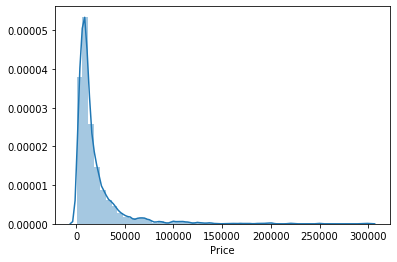

In [9]:
price = df1['Price'].dropna()
sns.distplot(price)

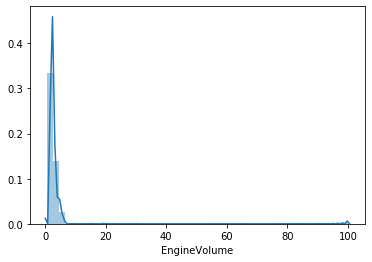

In [10]:
enginevolume = df1['EngineVolume'].dropna()
sns.distplot(enginevolume)

<p>Karena ternyata data enginevolume dan price exponensial jadinya ga boleh diisi data yang hilang dengan nilai mean harus median</p>

In [12]:
me1 = df1['Price'].median()
me2 = df1['EngineVolume'].median()

In [14]:
me1

11500.0

In [15]:
me2

2.2

In [16]:
df_final = dataset_mobil

In [17]:
dict_in = {'Price':me1 , 'EngineVolume':me2}
df_final = df_final.fillna(dict_in)
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4345 entries, 0 to 4344
Data columns (total 9 columns):
Brand           4345 non-null object
Body            4345 non-null object
Mileage         4345 non-null int64
EngineVolume    4345 non-null float64
Engine Type     4345 non-null object
Registration    4345 non-null object
Year            4345 non-null int64
Model           4345 non-null object
Price           4345 non-null float64
dtypes: float64(2), int64(2), object(5)
memory usage: 305.6+ KB


In [18]:
x = df_final['Mileage']
y = df_final['Price']

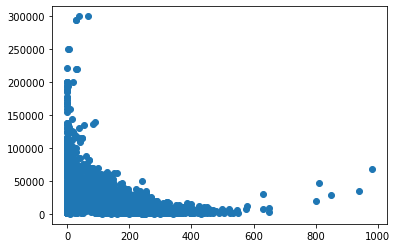

In [19]:
plt.scatter(x,y)
plt.show()

In [20]:
df2 = df_final[['Price','Mileage']]
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4345 entries, 0 to 4344
Data columns (total 2 columns):
Price      4345 non-null float64
Mileage    4345 non-null int64
dtypes: float64(1), int64(1)
memory usage: 68.0 KB


In [21]:
df2.corr()

,Price,Mileage
Price,1.000000,-0.442674
Mileage,-0.442674,1.000000


<h1>4. Covariation Mileage vs Price</h1>

In [22]:
df3 = df_final[['Price','Mileage']]
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4345 entries, 0 to 4344
Data columns (total 2 columns):
Price      4345 non-null float64
Mileage    4345 non-null int64
dtypes: float64(1), int64(1)
memory usage: 68.0 KB


In [23]:
df3.cov()

,Price,Mileage
Price,6.310211e+08,-1.175452e+06
Mileage,-1.175452e+06,1.117372e+04


<h1>5. Contoh Hubungan CCA pada dataset mobil ini</h1>

In [24]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4345 entries, 0 to 4344
Data columns (total 9 columns):
Brand           4345 non-null object
Body            4345 non-null object
Mileage         4345 non-null int64
EngineVolume    4345 non-null float64
Engine Type     4345 non-null object
Registration    4345 non-null object
Year            4345 non-null int64
Model           4345 non-null object
Price           4345 non-null float64
dtypes: float64(2), int64(2), object(5)
memory usage: 305.6+ KB


<p> info diatas menunjukkan tipe2 variabel yang ada<p>

<p> Kemungkinan hubungan CCA yang ada adalah : </p> 
<ul> Dependent variabel : Price dan EngineVolume (yang mau dicari)</ul>
<ul> Independent variabel : Mileage dan Year </ul>